In [3860]:
# Dependencies
import pandas as pd
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st
import numpy as np

In [3861]:
# Load files in
mouse_meta = os.path.join("data", "Mouse_metadata.csv")
study_results = os.path.join("data", "Study_results.csv")
mouse_meta = pd.read_csv(mouse_meta)
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3862]:
# Merge files
combined_df = pd.merge(mouse_meta, study_results, how ="outer", on = "Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3863]:
#Checking the number of mice
mouse_count = len(combined_df.groupby("Mouse ID").nunique())
print(mouse_count)

249


In [3864]:
# Find duplicated mouse
duplicate_mouse = combined_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_mouse


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [3865]:
# Store location and Display location of duplicate mouse
dup_mouse = combined_df.loc[duplicate_mouse, "Mouse ID"].unique()
dup_mouse

array(['g989'], dtype=object)

In [3866]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_df.loc[combined_df["Mouse ID"] == dup_mouse[0]]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3867]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# This becomes the file we do a lot of the final analysis with!
finaluse_df = combined_df.drop(dup_mouse.index)
finaluse_df  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3868]:
#Checking the number of mice again to make sure mouse was dropped
mouse_count1 = len(finaluse_df.groupby("Mouse ID").nunique())
print(mouse_count1)

248


In [3869]:
# Generate a summary statistics table by DRUG regimen
bydrug_df = finaluse_df.groupby("Drug Regimen")
bydrug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [3870]:
#Take a quick overview of the Data
bydrug_df.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          148.0  10.006757  6.946341  1.0   5.00   7.5  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          148.0  27.135135  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                148.0  1.013514  1.106484  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [3871]:
bydrug_df.value_counts()

Drug Regimen  Mouse ID  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
Capomulin     b128      Female  9           22          0          45.000000           0                   1
                                                        5          45.651331           0                   1
              j119      Female  7           23          45         38.125164           1                   1
              l509      Male    17          21          15         47.488599           1                   1
                                                        10         46.759074           0                   1
                                                                                                          ..
Zoniferol     k894      Female  13          29          10         49.272870           1                   1
                                                        5          47.645687           0                   1
                        

In [3872]:
# Generate a summary statistics table by DRUG regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean1 = bydrug_df["Tumor Volume (mm3)"].mean()
median1 = bydrug_df["Tumor Volume (mm3)"].median()
var1 = bydrug_df["Tumor Volume (mm3)"].var()
std1 = bydrug_df["Tumor Volume (mm3)"].std()
sem1 =bydrug_df["Tumor Volume (mm3)"].sem()

In [3873]:
# Assemble the resulting series into a single summary DataFrame.
results_df = pd.DataFrame({"Mean:":mean1,
    "Median:":median1,
    "Variance:":var1,
    "Standard Deviation:":std1,
    "SEM:":sem1})

In [3874]:
# Display Data Frame
results_df

,Mean:,Median:,Variance:,Standard Deviation:,SEM:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3875]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

aggregation_df = bydrug_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
aggregation_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3876]:
aggregation_final_df = aggregation_df.rename(columns={"mean":"Mean:",
    "median":"Median:",
    "var":"Variance",
    "std":"Standard Deviation:",
    "sem":"SEM:"})
aggregation_final_df

,Mean:,Median:,Variance,Standard Deviation:,SEM:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3877]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count_drug = finaluse_df["Drug Regimen"].value_counts()
mouse_count_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

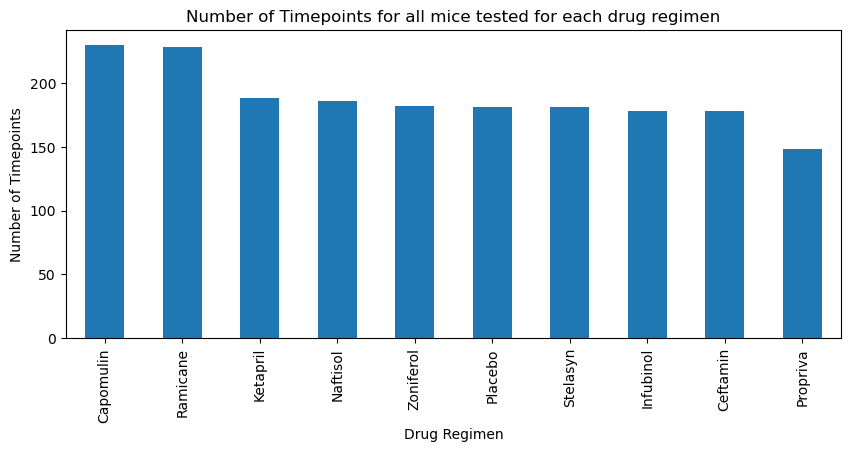

In [3878]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_chart = mouse_count_drug.plot.bar(figsize=(10,4))
# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Timepoints")
count_chart.set_title("Number of Timepoints for all mice tested for each drug regimen")
plt.show()

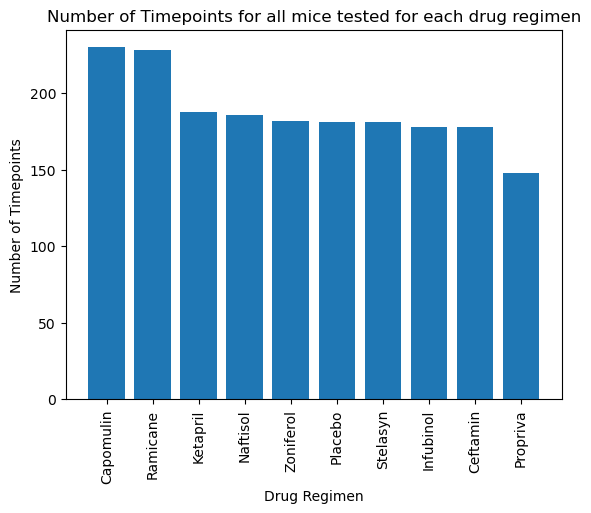

In [3879]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_count_drug))
plt.bar(x_axis, mouse_count_drug)
tickloc = [x for x in x_axis]
plt.xticks(tickloc, mouse_count_drug.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for all mice tested for each drug regimen")
plt.show()

In [3880]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_sex = finaluse_df["Sex"].value_counts()
panda_sex


Male      958
Female    922
Name: Sex, dtype: int64

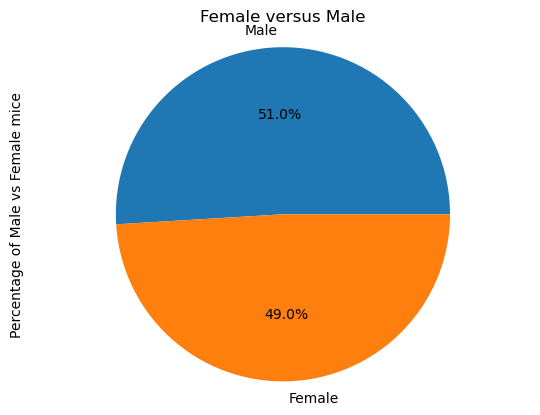

In [3881]:
branch_pie = panda_sex.plot.pie(startangle=0,title=("Female versus Male"),autopct="%1.1f%%")
branch_pie.set_ylabel("Percentage of Male vs Female mice")

plt.axis("equal")
plt.show()

In [3882]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt_sex = finaluse_df["Sex"].value_counts()
label = plt_sex.index.values
print(plt_sex)
print(label)

Male      958
Female    922
Name: Sex, dtype: int64
['Male' 'Female']


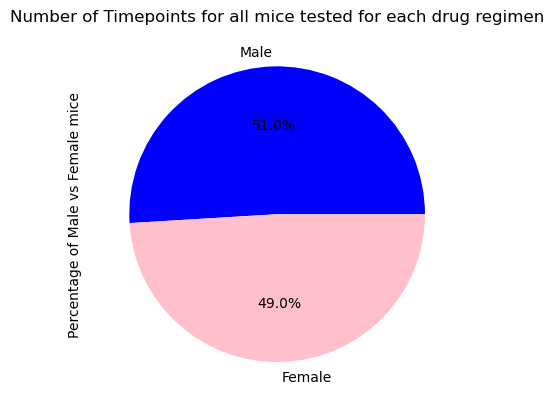

In [3883]:
colors = ["blue","pink"]
plt.pie(plt_sex, labels=label, autopct="%1.1f%%", startangle=0, colors=colors,shadow=False)
plt.title("Number of Timepoints for all mice tested for each drug regimen")
plt.ylabel("Percentage of Male vs Female mice")
plt.show()

In [3884]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_all = finaluse_df.groupby(["Drug Regimen","Mouse ID"]).last()
final_tumor_all

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Capomulin    b128      Female           9          22         45   
             b742        Male           7          21         45   
             f966        Male          16          17         20   
             g288        Male           3          19         45   
             g316      Female          22          22         45   
...                       ...         ...         ...        ...   
Zoniferol    q633        Male          12          25         45   
             s337        Male          14          27         45   
             w140      Female          19          30          5   
             w575      Female          16          28         45   
             x613      Female           2          29         15   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Capomulin    b128               38.982878                 2  
             b742               38.939633                 0  
             f966               30.485985                 0  
             g288               37.074024                 1  
             g316               40.159220                 2  
...                                   ...               ...  
Zoniferol    q633               70.827796                 2  
             s337               62.109651                 4  
             w140               47.717952                 0  
             w575               68.401286                 3  
             x613               48.077646                 0  

[248 rows x 6 columns]

In [3885]:
#Getting the Timpoint per Tumor Volume from general Drug by Mouse ID DataFrame.
final_tumor_timepoint = finaluse_df.groupby(["Drug Regimen","Mouse ID"]).last()[["Timepoint","Tumor Volume (mm3)"]]
final_tumor_timepoint

Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             f966             20           30.485985
             g288             45           37.074024
             g316             45           40.159220
...                          ...                 ...
Zoniferol    q633             45           70.827796
             s337             45           62.109651
             w140              5           47.717952
             w575             45           68.401286
             x613             15           48.077646

[248 rows x 2 columns]

In [3886]:
final_timepoint_df = final_tumor_timepoint.reset_index()
final_timepoint_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [3887]:
# Get list of drugs from DF
drug = final_timepoint_df["Drug Regimen"].unique()
drug

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [3888]:
# Put treatments into a list for for loop (and later for plot labels)
drug1 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [3889]:
# Create empty list to fill with tumor vol data (for plotting)
final_volume_data = []

In [3890]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
for drug in drug1:  
    
    # The final volume equals the location of Drug Regimen equalling drug tumor volume
    final_volume = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug,("Tumor Volume (mm3)")]
    # add total to final volume data
    final_volume_data.append(final_volume)

    quartiles = final_volume.quantile([.25,.5,.75])
    # print("Quartiles:")
    # print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    meanq =  quartiles[0.5]
    iqr = upperq-lowerq
        # Keep count of outliers < lower bound and > upper bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_count = (final_volume.loc[(final_volume < lower_bound)|(final_volume > upper_bound)])
    print(f"The following information is for Drug: {drug}.")
    print("_"*100)
    print(f"The lower quartile of Drug: {drug} is: {lowerq}, and the upper quartile is: {upperq}")
    print(f"The interquartile range of Drug: {drug} is: {iqr} and the median is: {meanq}")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    print(f"Outlier count for Drug: {drug} equals {outlier_count.count()}")
    # print out location in library of outlier_count based on count of which loop we are in in other loop
    if outlier_count.count() > 0:
        for x in outlier_count.index:
            print(f"Outlier Tumor volume is: {outlier_count[x]}")
    print("_"*100)


The following information is for Drug: Capomulin.
____________________________________________________________________________________________________
The lower quartile of Drug: Capomulin is: 32.37735684, and the upper quartile is: 40.1592203
The interquartile range of Drug: Capomulin is: 7.781863460000004 and the median is: 38.1251644
Values below 20.70456164999999 and above 51.83201549 could be outliers.
Outlier count for Drug: Capomulin equals 0
____________________________________________________________________________________________________
The following information is for Drug: Ramicane.
____________________________________________________________________________________________________
The lower quartile of Drug: Ramicane is: 31.56046955, and the upper quartile is: 40.65900627
The interquartile range of Drug: Ramicane is: 9.098536719999998 and the median is: 36.56165229
Values below 17.912664470000003 and above 54.30681135 could be outliers.
Outlier count for Drug: Ramicane e

In [3891]:
final_volume_data

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 174    38.407618
 175    43.047543
 176    38.810366
 177    32.978522
 178    38.342008
 179    33.397653
 180    37.311236
 181    40.659006
 182    29.128472
 183    33.562402
 184    36.374510
 185    31.560470
 186    36.134852
 187    22.050126
 188    30.564625
 189    31.095335
 190    45.220869
 191    36.561652
 192    37.225650
 193    43.419381
 194    30.276232
 195    40.667713
 196    43.166373
 197    44.183451
 198    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

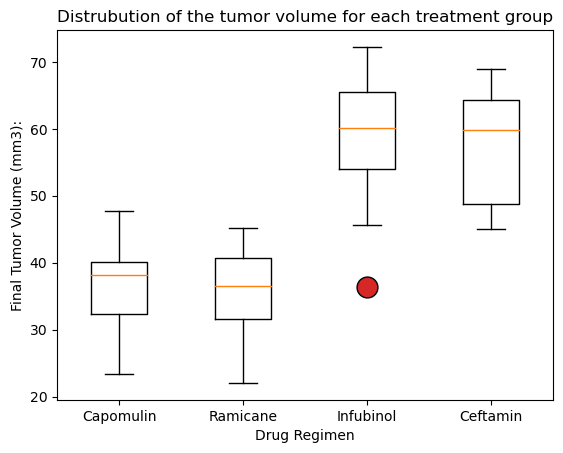

In [3892]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
filled_marker_style = dict(marker='o',
    linestyle='none', markersize=15,
    color='darkgrey',
    markerfacecolor='tab:red',
    markeredgecolor='black')
plt.boxplot(final_volume_data, flierprops = filled_marker_style, notch=False)
plt.title("Distrubution of the tumor volume for each treatment group")
plt.ylabel("Final Tumor Volume (mm3):")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4],drug1)
plt.show()

Text(0.5, 1.0, 'The journey of mouse f966')

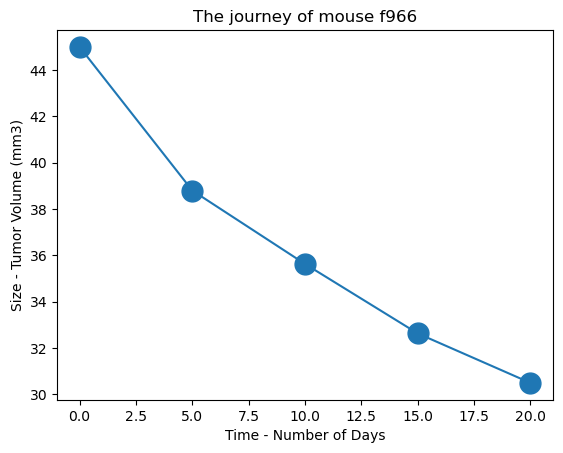

In [3893]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = finaluse_df.loc[finaluse_df["Mouse ID"] == "f966"]
plt.plot(mouse_line["Timepoint"], mouse_line["Tumor Volume (mm3)"], marker = 'o', markersize=15)
plt.xlabel("Time - Number of Days")
plt.ylabel("Size - Tumor Volume (mm3)")
plt.title(f"The journey of mouse f966")


In [3894]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatt_plot = finaluse_df.loc[finaluse_df["Drug Regimen"] == "Capomulin"]
scatt_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [3895]:
tumor_vs_weight_mean = scatt_plot.groupby(["Mouse ID"]).mean()
tumor_vs_weight_mean

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


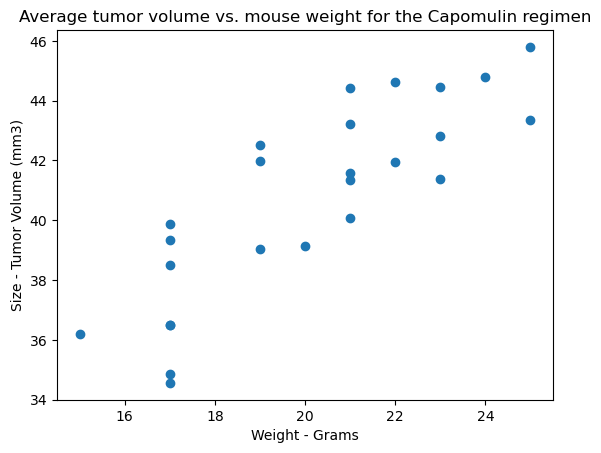

In [3896]:
plt.scatter(tumor_vs_weight_mean["Weight (g)"],tumor_vs_weight_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight - Grams")
plt.ylabel("Size - Tumor Volume (mm3)")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

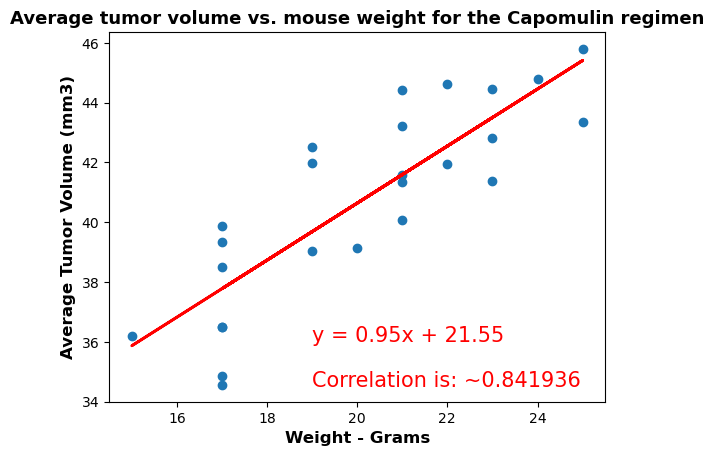

In [3897]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_ax = tumor_vs_weight_mean["Tumor Volume (mm3)"]
x_ax = tumor_vs_weight_mean["Weight (g)"]
plt.xlabel("Weight - Grams",fontsize = 12, fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)",fontsize = 12, fontweight="bold")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen",fontsize = 13, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax, y_ax)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x_ax, y_ax)
d_fit = d_slope * x_ax + d_int
# Plot the main scatter.
plt.scatter(x_ax, y_ax)
# Plot the line.
plt.plot(x_ax ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (19,36), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(19, 34.5, line_eq1, fontsize=15,color="red")
# Show the graph
plt.show()